# Iris Flowers Classification ML Project

# About the Data

In this Project,  First we will see Logistic Regression, and then we will understand the working of an algorithm with the Iris Flower Dataset. This Dataset contains features of different flower species. Independent features in this dataset are Sepal Length, Sepal Width, Petal Length, and Petal Width. All these lengths were in centimeters. And Dependent feature, which will be the output for the model, is Species. It contains the name of the species to which that particular flower with those measurements belongs. 

# Data Preparation

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set1')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading the Dataset and Giving Names to the columns
columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
iris = pd.read_csv('/content/iris.data', names = columns)


In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Showing First Five Rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Showing last 5 Rows
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Showing No. of Rows and Columns in a dataset
iris.shape

(150, 5)

In [ ]:
# Showing Columns
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

# Data Preprocessing

In [ ]:
# Checking Duplicated Values
iris.duplicated().sum()

3

In [ ]:
# Showing Rows having Duplicated values 
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
# Dropping Duplicated Values
iris = iris.drop_duplicates()

In [ ]:
# Checking For Duplicated Values 
iris.duplicated().any()

False

In [ ]:
# Resetting the index
iris.reset_index(drop=True,inplace=True)

In [ ]:
# Checking for null values
iris.isna().sum() # No Null Values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [ ]:
# Showing Information about the Dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   class         147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
# Showing Statistical Summary of the Numerical Columns
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualzation

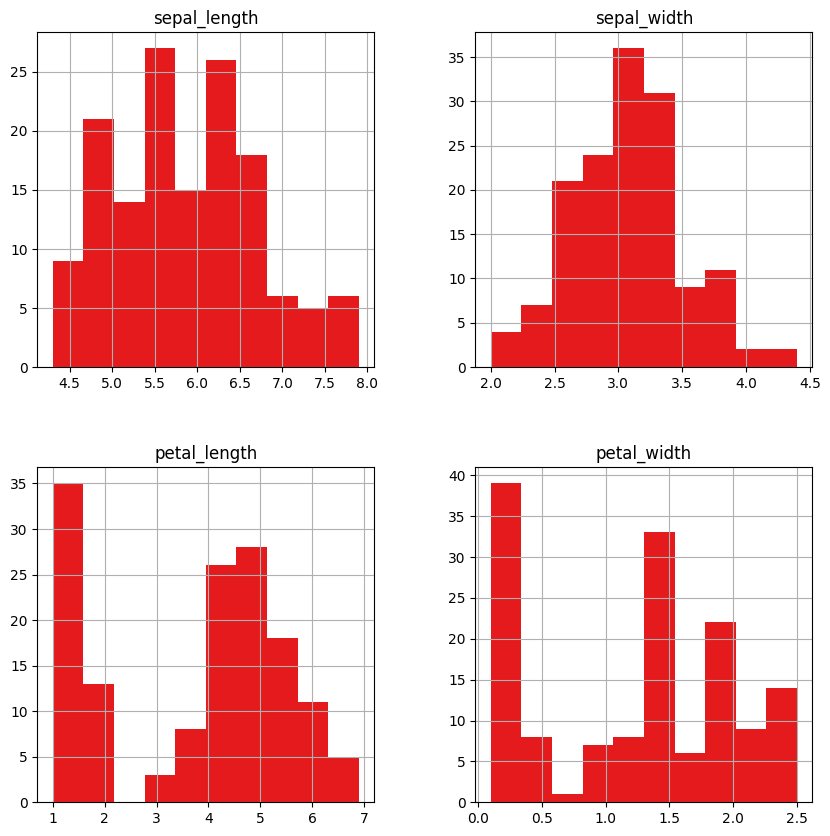

In [ ]:
# Showing Histplot
iris.hist(figsize=(10,10))
plt.show()

In [ ]:
# Counting the values for class Column
iris['class'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: class, dtype: int64

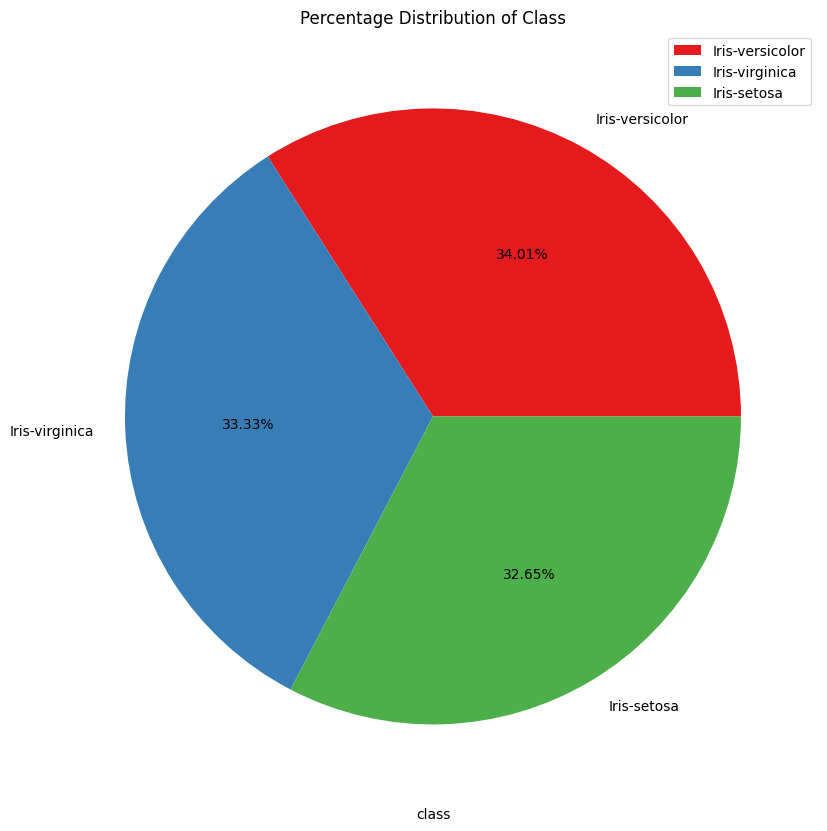

In [ ]:
# Finding Percentage Distribution of Class
plt.figure(figsize=(20,10))
iris['class'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Percentage Distribution of Class')
plt.legend(iris['class'].value_counts().index)
plt.xlabel('class')
plt.ylabel(None)
plt.show()

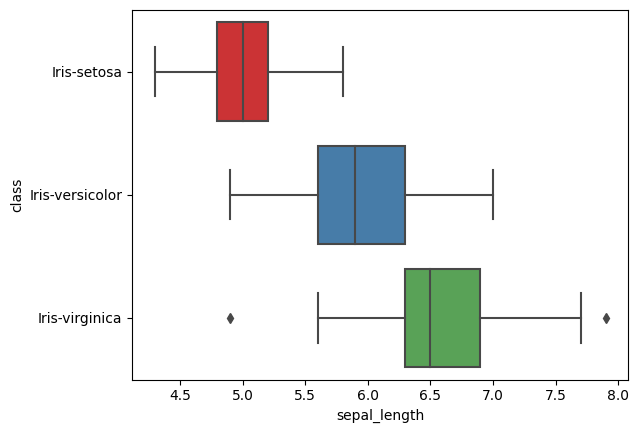

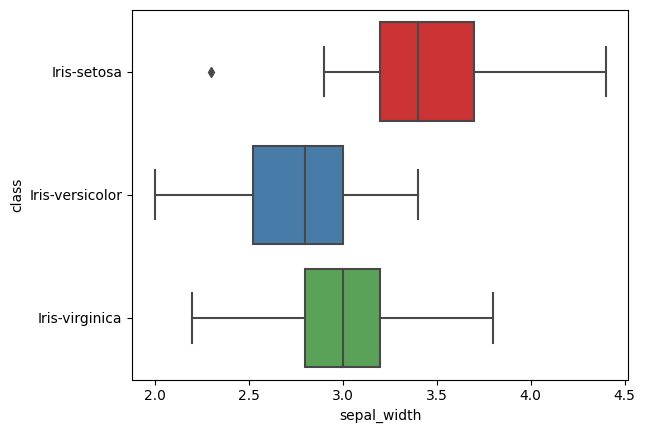

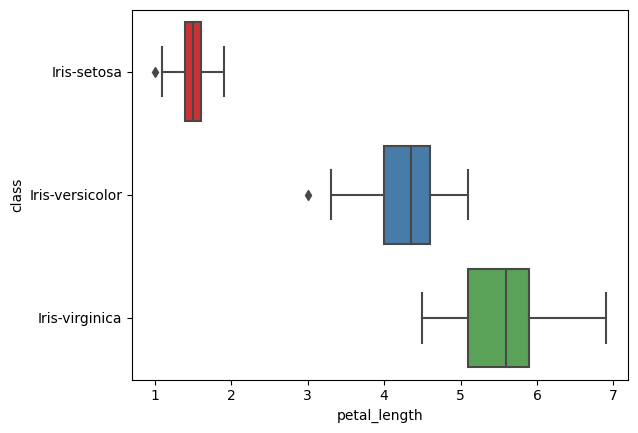

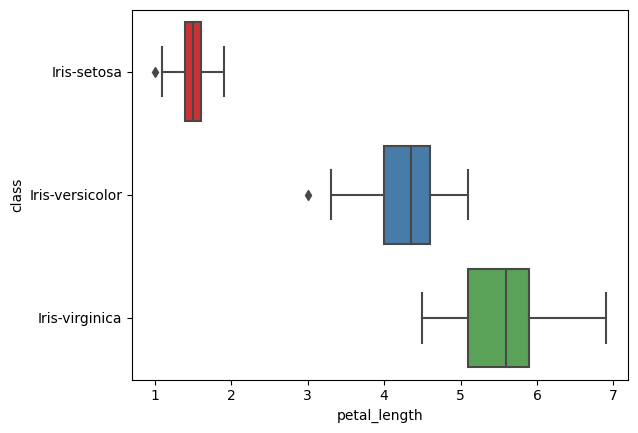

In [ ]:
# Showing BoxPlot for all the Numerical Columns
sns.boxplot(data = iris , x='sepal_length', y='class')
plt.show()
sns.boxplot(data=iris, x='sepal_width', y='class')
plt.show()
sns.boxplot(data = iris , x='petal_length', y='class')
plt.show()
sns.boxplot(data = iris , x='petal_length', y='class')
plt.show()

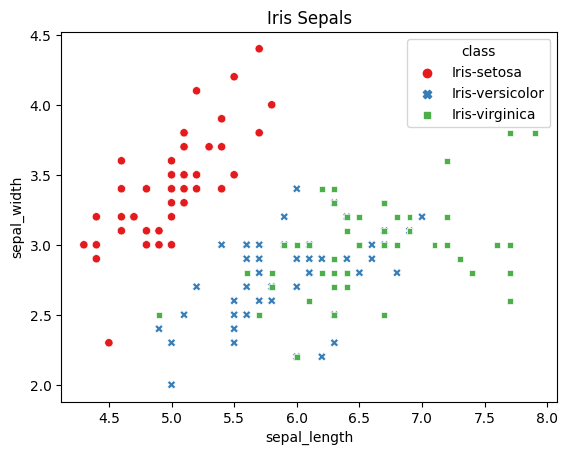

In [ ]:
# Showing Relationship Between Sepal_Length and Sepal_Width on the basis of Class 
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='class', style='class')
plt.title('Iris Sepals')
plt.show()

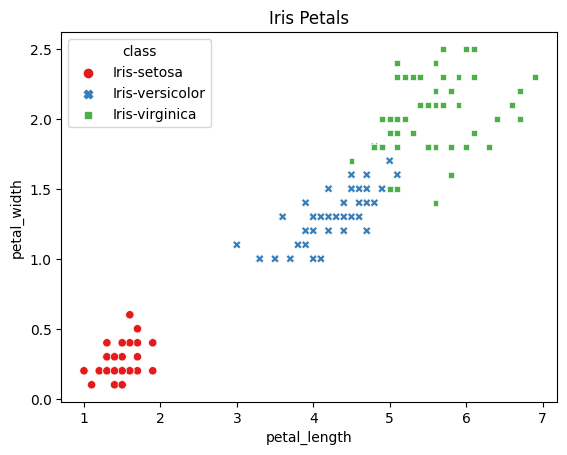

In [ ]:
# Showing Relationship Between Petal_Length and Petal_Width on the basis of Class
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='class', style='class')
plt.title('Iris Petals')
plt.show()

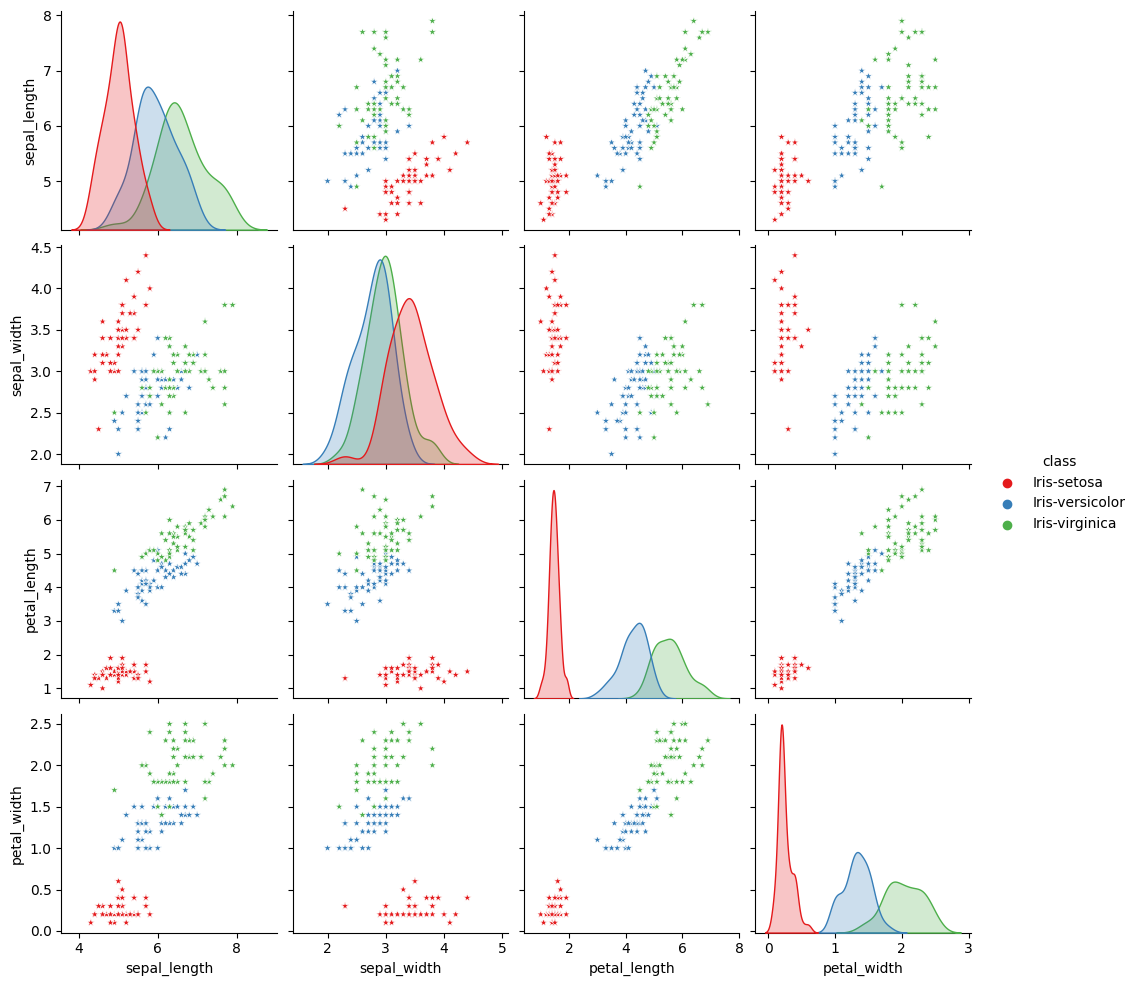

In [ ]:
# Showing PairPlot
sns.pairplot(iris,hue='class',markers='*')

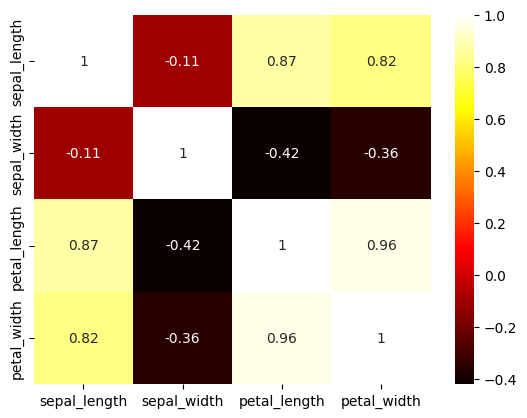

In [ ]:
# Showing Correlation Plot
corr = iris.corr()
sns.heatmap(corr,annot=True,cmap='hot')
plt.show()

# Data Encoding 

Encoding values of Class into numerical values using LabelEncoder() Module

In [ ]:
le = LabelEncoder()

In [ ]:
iris['class'] = le.fit_transform(iris['class'])
iris['class'].unique()

array([0, 1, 2])

In [ ]:
x = iris.drop(['class'],axis=1)
y = iris['class']

# Splitting the Data into Training Data and Testing Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 4)
(30, 4)
(117,)
(30,)


# Logistic Regression

Creating Object

In [ ]:
lr = LogisticRegression()

Data feeding to object that we have created

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

Let's Make Prediction on training Data

In [ ]:
prediction_on_training = lr.predict(x_train)
print(prediction_on_training)

[1 2 1 0 0 1 2 1 0 1 1 0 1 2 1 2 2 0 1 0 2 0 0 2 1 2 0 2 2 1 0 1 2 0 1 0 2
 2 2 1 2 0 2 2 0 2 1 2 0 0 0 2 1 2 0 0 0 1 2 1 1 2 2 2 2 1 0 0 1 0 0 2 1 0
 0 0 1 0 1 0 1 2 0 1 1 2 0 2 0 1 1 2 1 1 1 2 1 0 1 2 2 1 1 2 0 2 0 0 1 0 2
 2 2 1 0 2 0]


Let's Make Prediction on testing Data

In [ ]:
prediction_on_testing = lr.predict(x_test)
print(prediction_on_testing)

[1 1 1 1 1 2 0 0 2 0 1 2 0 0 0 1 0 1 2 1 1 1 1 0 1 1 2 2 0 2]


Performance in Training

In [ ]:
print("Confusion Metrics is \n", confusion_matrix(y_train,prediction_on_training))

print("Classification Report is \n", classification_report(y_train,prediction_on_training))

print("Accuracy Score is ", accuracy_score(y_train,prediction_on_training))

Confusion Metrics is 
 [[39  0  0]
 [ 0 37  2]
 [ 0  1 38]]
Classification Report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.95      0.96        39
           2       0.95      0.97      0.96        39

    accuracy                           0.97       117
   macro avg       0.97      0.97      0.97       117
weighted avg       0.97      0.97      0.97       117

Accuracy Score is  0.9743589743589743


Performance In Testing

In [ ]:
print("Confusion Metrics is \n", confusion_matrix(y_test,prediction_on_testing))

print("Classification Report is \n", classification_report(y_test,prediction_on_testing))

print("Accuracy Score is ", accuracy_score(y_test,prediction_on_testing))

Confusion Metrics is 
 [[ 9  0  0]
 [ 0 11  0]
 [ 0  3  7]]
Classification Report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.79      1.00      0.88        11
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.93      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30

Accuracy Score is  0.9


Logistic Regression Model gave 97 % Accuracy

# Let's Try Another Model i.e.. KNeighborsClassifier Model

Creating Object

In [ ]:
knn = KNeighborsClassifier()

Data feeding to object that we have created

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
prediction = knn.predict(x_test)
print(prediction)

[2 1 1 1 1 2 0 0 2 0 1 2 0 0 0 1 0 1 2 2 1 1 1 0 1 1 2 2 0 2]


Let's make prediction on training data

In [ ]:
print("Confusion Metrics is \n", confusion_matrix(y_test,prediction))

print("Classification Report is \n", classification_report(y_test,prediction))

print("Accuracy Score is ", accuracy_score(y_test,prediction))

Confusion Metrics is 
 [[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]
Classification Report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy Score is  0.9666666666666667


KNeighborsClassifier Model gave 97% Accuracy

# Conclusion

Iris Classification Dataset is very simple nd Basic Dataset which contains the data about various features of Iris Flowers .  This classification can be done by many classification algorithms in machine learning but in this Project, we used logistic regression and KnnClassifier Model. Overall the result after training and testing both the Model we get 97 % Accuracy. which shows the model that we built is perfectly accurate.